In [15]:
import os
import sys
import numpy as np
import pandas as pd
import plotly.express as px

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 5000)

In [16]:
FEATURE_DIR_NAME = '../data/features/'
SUB_DIR_NAME = '../models/lgb_KFold_06231738/'

In [17]:
label_df = pd.read_csv(SUB_DIR_NAME + 'lgb_KFold_06231738_submission.csv')

In [18]:
display(label_df.head(), label_df.shape)

id             y
0   1  2.473795e+05
1   2  2.406180e+06
2   3  9.437756e+05
3   4  1.651638e+05
4   5  2.554409e+02

(29582, 2)

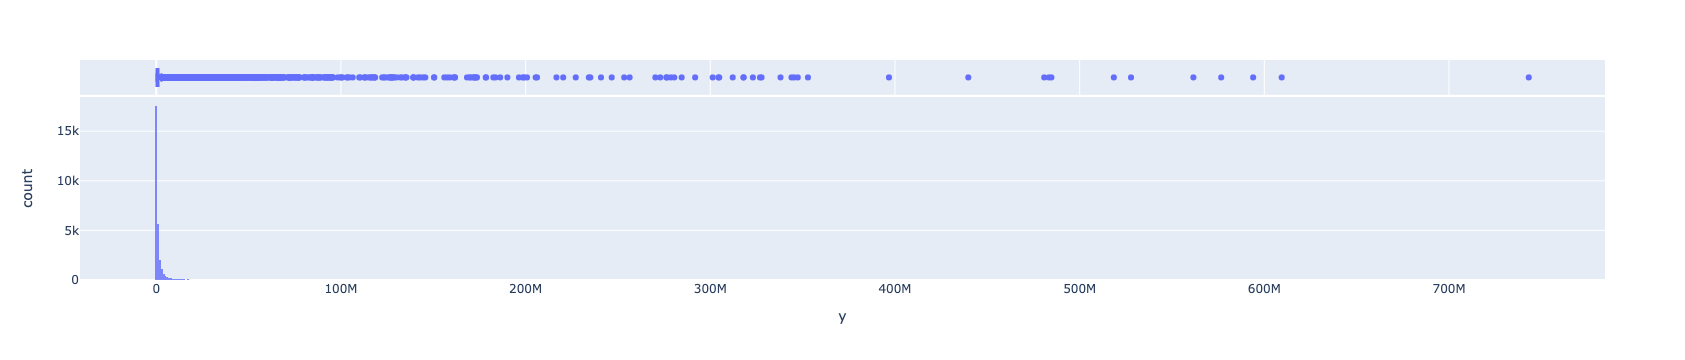

In [19]:
fig = px.histogram(label_df,
                   x='y',
                   width=1000,
                   height=300,
                   opacity=0.8,
                   marginal='box'
            )
fig.update_layout(barmode='overlay')
fig.show()

### train, testの読み込み

In [20]:
train = pd.read_pickle(FEATURE_DIR_NAME + 'train.pkl')
test = pd.read_pickle(FEATURE_DIR_NAME + 'test.pkl')

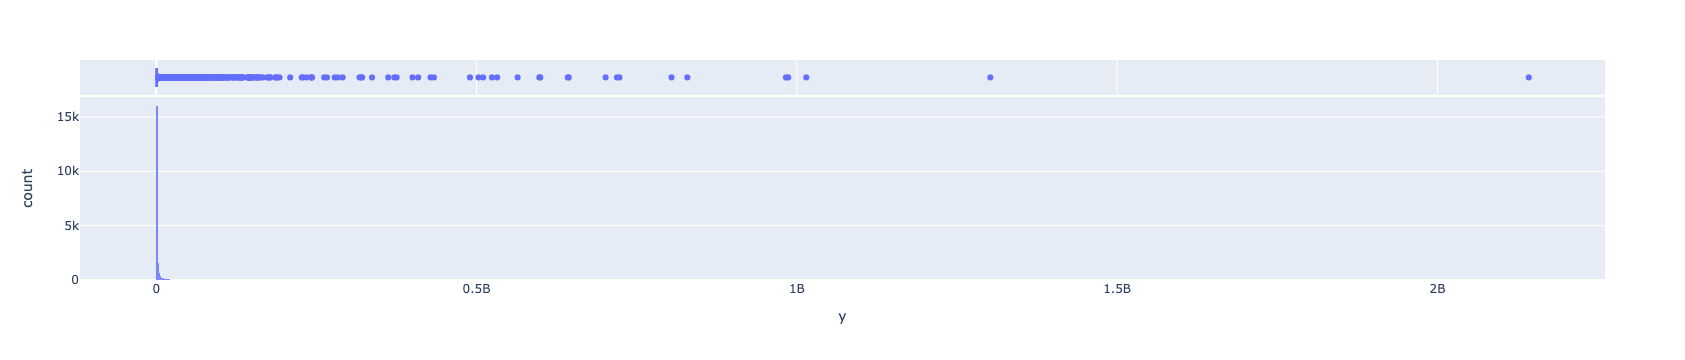

In [21]:
fig = px.histogram(train,
                   x='y',
                   width=1000,
                   height=300,
                   opacity=0.8,
                   marginal='box'
            )
fig.update_layout(barmode='overlay')
fig.show()

In [22]:
# indexを初期化
test = test.reset_index(drop=True)

In [23]:
display(test.head(2), test.shape)

id     video_id                            title               publishedAt  \
0   1  xU8UcB6RbLE    Frightened Rabbit - The Greys 2007-09-26 11:00:07+00:00   
1   2  ENuB3qHCp0s  Eダンスアカデミー『EXダンス体操（EXILEのダンス体操）』 2016-05-27 15:00:00+00:00   

   channelId    channelTitle  categoryId collection_date  \
0       9071  Fatcat Records          10      2020-01-08   
1       1756             NHK          24      2020-02-09   

                                                                                      tags  \
0                                               Fatcat|Records|Frightened|Rabbit|The|Greys   
1  Ｅダンス|Ｅアカ|EXILE|EXダンス体操|ダンス体操|EX体操|エクササイズ、GENERATIONS|USA|TETSUYA|めちゃくちゃダンス|コンテスト|投稿|ダンス   

   likes  dislikes  comment_count  \
0    471        38             61   
1   6797       666              0   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/xU8UcB6RbLE/default.jpg                  0   
1  https://i.ytimg.com/vi/ENuB3qHCp0s/default.jpg                  1   

   ratings_disabled  \
0                 0   
1                 0   

                                                                                                                                                                                                                                                                                                                                   description  \
0                                                                                                                                                                                                          Director: Fraser CampbellDate:2007Taken from Frightened Rabbits Sings The Greys LP on Fatcat Records.Buy here: http://bit.ly/IvUvy9   
1  EXILEがダンスを楽しく分かりやすくレッスンする「Eダンスアカデミー」毎週金曜日に放送中！テレビを見ながらマネするだけでダンスの基本が身につく「まねっこ！うさっこ！てつやっこ！」や、EXILE USAが考えた番組オリジナルエクササイズ「EXダンス体操」など、一緒に踊って楽しめるコーナーがてんこ盛り！みなさんからの投稿動画も募集中です！番組ではこの「EXダンス体操」の投稿動画を募集中です！NHK「Eダンスアカデミー」から生まれた「EXダンス体操」。EXILE USAが考えた、楽しくダンスをしながら全身を使った運動にもなるダンスエクササイズです！【放送情報】NHK Eテレ（金）午後 6：55～「Eダンスアカデミー」http://nhk.jp/e-dance   

    y  title_len  publishedAt_hour  publishedAt_minute  publishedAt_year  \
0 NaN         29                11                   0              2007   
1 NaN         31                15                   0              2016   

   publishedAt_quarter  publishedAt_month  publishedAt_week  publishedAt_day  \
0                    3                  9                39               26   
1                    2                  5                21               27   

   publishedAt_dayofweek  publishedAt_is_weekend  publishedAt_quarter_cos  \
0                      2                       0            -1.836970e-16   
1                      4                       0            -1.000000e+00   

   publishedAt_quarter_sin  publishedAt_month_cos  publishedAt_month_sin  \
0            -1.000000e+00          -1.836970e-16                   -1.0   
1             1.224647e-16          -8.660254e-01                    0.5   

   publishedAt_day_cos  publishedAt_day_sin  publishedAt_dayofweek_cos  \
0             0.528964            -0.848644                       -0.5   
1             0.688967            -0.724793                       -0.5   

   publishedAt_dayofweek_sin     collection_date_after  collection_date_year  \
0                   0.866025 2020-01-08 00:00:00+00:00                  2020   
1                  -0.866025 2020-02-09 00:00:00+00:00                  2020   

   collection_date_quarter  collection_date_month  collection_date_week  \
0                        1                      1                     2   
1                        1                      2                     6   

   collection_date_day  collection_date_dayofweek  collection_date_is_weekend  \
0                    8                          2                           0   
1                    9                          6                           1   

   collection_da

(29582, 2543)

In [24]:
# 擬似ラベルを追加
test.loc[:, 'y'] = label_df['y']

In [25]:
display(test.head(2), test.tail(2), test.shape)

id     video_id                            title               publishedAt  \
0   1  xU8UcB6RbLE    Frightened Rabbit - The Greys 2007-09-26 11:00:07+00:00   
1   2  ENuB3qHCp0s  Eダンスアカデミー『EXダンス体操（EXILEのダンス体操）』 2016-05-27 15:00:00+00:00   

   channelId    channelTitle  categoryId collection_date  \
0       9071  Fatcat Records          10      2020-01-08   
1       1756             NHK          24      2020-02-09   

                                                                                      tags  \
0                                               Fatcat|Records|Frightened|Rabbit|The|Greys   
1  Ｅダンス|Ｅアカ|EXILE|EXダンス体操|ダンス体操|EX体操|エクササイズ、GENERATIONS|USA|TETSUYA|めちゃくちゃダンス|コンテスト|投稿|ダンス   

   likes  dislikes  comment_count  \
0    471        38             61   
1   6797       666              0   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/xU8UcB6RbLE/default.jpg                  0   
1  https://i.ytimg.com/vi/ENuB3qHCp0s/default.jpg                  1   

   ratings_disabled  \
0                 0   
1                 0   

                                                                                                                                                                                                                                                                                                                                   description  \
0                                                                                                                                                                                                          Director: Fraser CampbellDate:2007Taken from Frightened Rabbits Sings The Greys LP on Fatcat Records.Buy here: http://bit.ly/IvUvy9   
1  EXILEがダンスを楽しく分かりやすくレッスンする「Eダンスアカデミー」毎週金曜日に放送中！テレビを見ながらマネするだけでダンスの基本が身につく「まねっこ！うさっこ！てつやっこ！」や、EXILE USAが考えた番組オリジナルエクササイズ「EXダンス体操」など、一緒に踊って楽しめるコーナーがてんこ盛り！みなさんからの投稿動画も募集中です！番組ではこの「EXダンス体操」の投稿動画を募集中です！NHK「Eダンスアカデミー」から生まれた「EXダンス体操」。EXILE USAが考えた、楽しくダンスをしながら全身を使った運動にもなるダンスエクササイズです！【放送情報】NHK Eテレ（金）午後 6：55～「Eダンスアカデミー」http://nhk.jp/e-dance   

              y  title_len  publishedAt_hour  publishedAt_minute  \
0  2.473795e+05         29                11                   0   
1  2.406180e+06         31                15                   0   

   publishedAt_year  publishedAt_quarter  publishedAt_month  publishedAt_week  \
0              2007                    3                  9                39   
1              2016                    2                  5                21   

   publishedAt_day  publishedAt_dayofweek  publishedAt_is_weekend  \
0               26                      2                       0   
1               27                      4                       0   

   publishedAt_quarter_cos  publishedAt_quarter_sin  publishedAt_month_cos  \
0            -1.836970e-16            -1.000000e+00          -1.836970e-16   
1            -1.000000e+00             1.224647e-16          -8.660254e-01   

   publishedAt_month_sin  publishedAt_day_cos  publishedAt_day_sin  \
0                   -1.0             0.528964            -0.848644   
1                    0.5             0.688967            -0.724793   

   publishedAt_dayofweek_cos  publishedAt_dayofweek_sin  \
0                       -0.5                   0.866025   
1                       -0.5                  -0.866025   

      collection_date_after  collection_date_year  collection_date_quarter  \
0 2020-01-08 00:00:00+00:00                  2020                        1   
1 2020-02-09 00:00:00+00:00                  2020                        1   

   collection_date_month  collection_date_week  collection_date_day  \
0                      1                     2                    8   
1                      2                     6                    9   

   collection_date_dayofweek  collection_date_is_weekend  \
0                          2                           0   
1                          6   

id     video_id  \
29580  29581  SUN1wGXAd3k   
29581  29582  hMO79XWfFJ8   

                                                                title  \
29580                 ブルーレイ&DVD『LEGO®スクービー・ドゥー：モンスターズ・ハリウッド』7月20日リリース   
29581  【マインクラフト】アイアンゴーレムトラップ作って鉄を大量ゲットするぞ！【ヒカキンのマイクラ実況 Part241】【ヒカクラ】   

                    publishedAt  channelId        channelTitle  categoryId  \
29580 2016-07-15 07:43:43+00:00        138  ワーナー ブラザース 公式チャンネル           1   
29581 2016-09-14 08:51:07+00:00        649        HikakinGames          20   

      collection_date  \
29580      2020-02-09   
29581      2020-02-09   

                                                                                                                                                  tags  \
29580                                                                                                                                           [none]   
29581  hikakingames|hikakin|beatbox|game|gameplay|ヒカキン|ヒカキンゲーム|ヒカキンゲームズ|ビートボックス|ボイパ|ゲーム|ゲーム実況|実況プレイ|実況|マインクラフト|マイクラ|minecraft|ヒカクラ|攻略|レシピ|アイアンゴーレムトラップ   

       likes  dislikes  comment_count  \
29580    136        39              1   
29581  26967      3649           3272   

                                       thumbnail_link  comments_disabled  \
29580  https://i.ytimg.com/vi/SUN1wGXAd3k/default.jpg                  0   
29581  https://i.ytimg.com/vi/hMO79XWfFJ8/default.jpg                  0   

       ratings_disabled  \
29580                 0   
29581                 0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           description  \
29580                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
29581  ◆参考にさせて頂いた動画https://www.youtube.com/watch?v=JIX9VQFTkAM◆チャンネル登録はこちら↓http://www.youtube.com/user/hikakingames?sub_confirmation=1◆日常動画のHikakinTV↓http://www.youtube.com/hikakintv◆ヒカキンLINEスタンプはこちらhttps://store.line.me/stickershop/product/1022677/ja◆ビートボックス動画のHIKAKINチャンネル↓http://www.youtube.com/HIKAKIN◆ラフな動画のHikakinBloghttp://www.youtube.com/hikakinblog◆ツイッター↓http://twitter.com/Hikakin◆ヒカキンLINE公式アカウント●友達登録はこちら↓http://line.naver.jp/ti/p/%40hikakin◆ヒカキンオフィシャルブログ↓http://hikakin.blog.jp/◆ヒカキン公式グッズ↓http://amzn.to/11Pm8eY◆ヒカキンTV動画はこちら↓http://www.youtube.com/hikakintv◆ヒカキンブログ動画はこちら↓http://www.youtube.com/hikakinblog◆ビートボックス動画はこちら↓http://www.youtube.com/HIKAKIN◆ヒカキンのオススメ商品や使用機材↓http://amzn.to/ZW7X6A◆ホームページ↓http://www.hikakintv.com/◆フェイスブック↓http://www.facebook.com/HIKAKIN※上記Amazonリンクはアソシエイトリンクを使用しています。   

                  y  title_len  publishedAt_hour  publishedAt_

(29582, 2543)

In [26]:
display(train.head(1), train.shape)

id     video_id                                       title  \
0   1  GDtyztIThRQ  [12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~   

                publishedAt  channelId channelTitle  categoryId  \
0 2011-01-09 05:50:33+00:00          1  DjangoShiny          20   

  collection_date  \
0      2020-02-01   

                                                                                                                                                                                                                                                                                                                          tags  \
0  Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyoui|no|Shinryakusha|sekai|he|chosen|challenge|to|the|world|anime|game|ds|music|soundtrack|background|t-pistonz+kmc|berryz|fire|blizzard|spark|bomber|ogre|rip|endou|endo|mark|goenji|kidou|fubuki|aki|kazemaru|someoka|kabeyama|alien|hiroto|midorikawa|song|themes|battle|ffi   

   likes  dislikes  comment_count  \
0    114         0              7   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg                  0   

   ratings_disabled  \
0                 0   

                                                     description        y  \
0  ~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (Ripped by Tommy)  29229.0   

   title_len  publishedAt_hour  publishedAt_minute  publishedAt_year  \
0         42                 5                  50              2011   

   publishedAt_quarter  publishedAt_month  publishedAt_week  publishedAt_day  \
0                    1                  1                 1                9   

   publishedAt_dayofweek  publishedAt_is_weekend  publishedAt_quarter_cos  \
0                      6                       1             6.123234e-17   

   publishedAt_quarter_sin  publishedAt_month_cos  publishedAt_month_sin  \
0                      1.0               0.866025                    0.5   

   publishedAt_day_cos  publishedAt_day_sin  publishedAt_dayofweek_cos  \
0            -0.250653             0.968077                        1.0   

   publishedAt_dayofweek_sin     collection_date_after  collection_date_year  \
0              -2.449294e-16 2020-02-01 00:00:00+00:00                  2020   

   collection_date_quarter  collection_date_month  collection_date_week  \
0                        1                      2                     5   

   collection_date_day  collection_date_dayofweek  collection_date_is_weekend  \
0                    1                          5                           1   

   collection_date_quarter_cos  collection_date_quarter_sin  \
0                 6.123234e-17                          1.0   

   collection_date_month_cos  collection_date_month_sin  \
0                        0.5                   0.866025   

   collection_date_day_cos  collection_date_day_sin  \
0                  0.97953                 0.201299   

   collection_date_dayofweek_cos  collection_date_dayofweek_sin  tags_num  \
0                            0.5                      -0.866025        48   

   tags_length  tags_point  tags_count_en  tags_count_ja  likes_log  \
0          315        5434             47              1   4.744932   

   likes_sqrt  dislikes_log  dislikes_sqrt  like_dislike_ratio  \
0   10.677078           0.0            0.0               114.0   

   comments_like_ratio  comments_dislike_ratio  comment_count_log  \
0              0.06087                     7.0           2.079442   

   likes_comments  dislikes_comments  comments_likes  description_len  \
0               0                  0               0               61   

   description_ishttp_in  delta  delta_log  delta_sqrt  delta_published  \
0                      0   3309   8.104401   57.523908             2086   

   delta_collection  isJa_title  isJa_tags  isJa_description  isEn_title  \
0                41        True       True              True       False   

   isEn_t

(19720, 2543)

In [27]:
# 保存
test.to_pickle(FEATURE_DIR_NAME + 'test_pseudo_06231738.pkl')

In [14]:
test

id     video_id  \
0          1  xU8UcB6RbLE   
1          2  ENuB3qHCp0s   
2          3  2eIeMPhXhSQ   
3          4  yXfmnY6QIOc   
4          5  dGbHHMKYGkw   
...      ...          ...   
29577  29578  8_ZeZZbLCRE   
29578  29579  Ic-hwvqyl1s   
29579  29580  lzSkw_sQDUw   
29580  29581  SUN1wGXAd3k   
29581  29582  hMO79XWfFJ8   

                                                                            title  \
0                                                   Frightened Rabbit - The Greys   
1                                                 Eダンスアカデミー『EXダンス体操（EXILEのダンス体操）』   
2                   『Lover Come Back To Me』 大西由希子×川口千里(Senri Kawaguchi)×岩永真奈×長崎祥子   
3                                                            konnkonn雛たち大きくなりました☆   
4                                  Anouk - Everything, Live cover by RU kiddin me   
...                                                                           ...   
29577  ♬パパママを助ける！赤ちゃんが泣き止んで喜ぶ歌メドレー | 赤ちゃんが喜ぶ英語の歌 | 子供の歌 | 童謡  | アニメ | 動画 |BabyBus   
29578                              レミーのおいしいレストラン Ratatouille Trailer 予告編（Preview)   
29579                                         スタンドアップパドルボード(SUP) ウィロー (TM)| コールマン   
29580                             ブルーレイ&DVD『LEGO®スクービー・ドゥー：モンスターズ・ハリウッド』7月20日リリース   
29581              【マインクラフト】アイアンゴーレムトラップ作って鉄を大量ゲットするぞ！【ヒカキンのマイクラ実況 Part241】【ヒカクラ】   

                    publishedAt  channelId             channelTitle  \
0     2007-09-26 11:00:07+00:00       9071           Fatcat Records   
1     2016-05-27 15:00:00+00:00       1756                      NHK   
2     2012-12-10 08:24:57+00:00       3049       atossinternational   
3     2012-02-27 05:23:46+00:00       9072                 cpj54293   
4     2007-11-24 15:18:04+00:00       1068               Vinzarelli   
...                         ...        ...                      ...   
29577 2017-05-21 09:00:01+00:00        120  BabyBus - 子供の歌 - 子どもの動画   
29578 2007-06-30 11:54:11+00:00      17413              BurnandCrop   
29579 2014-07-14 03:39:26+00:00       4742            コールマン ジャパン 公式   
29580 2016-07-15 07:43:43+00:00        138       ワーナー ブラザース 公式チャンネル   
29581 2016-09-14 08:51:07+00:00        649             HikakinGames   

       categoryId collection_date  \
0              10      2020-01-08   
1              24      2020-02-09   
2              10      2020-02-03   
3              15      2020-02-02   
4              10      2020-01-10   
...           ...             ...   
29577          27      2020-02-09   
29578           1      2020-01-07   
29579          17      2020-02-08   
29580           1      2020-02-09   
29581          20      2020-02-09   

                                                                                                                                                                                                                                                                                                                     tags  \
0                                                                                                                                                                                                                                                                              Fatcat|Records|Frightened|Rabbit|The|Greys   
1                                                                                                                                                                                                                                 Ｅダンス|Ｅアカ|EXILE|EXダンス体操|ダンス体操|EX体操|エクササイズ、GENERATIONS|USA|TETSUYA|めちゃくちゃダンス|コンテスト|投稿|ダンス   
2                                                                                                                                                                                                         大西由希子|岩永真奈|川口千里|教則|長崎祥子|ジャズ|ユッコミラー|atossinternational|ライブ|Senri Kawaguchi|DrumSolos|Drummer|Drums|Drumming|Jazz   
3                                                                         